In [21]:
import pandas as pd
import numpy as np
import math

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 100)

raw_df = (pd.read_csv("data.csv"))
display(raw_df.columns)
# display(raw_df)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availab

In [22]:
# Определяем стратегии трансформации данных
# Сама трансформация определена в mappers.py
# TODO: Разобраться с категориальными переменными

col_strategies = {
#     'id': 'Ignore',
#     'listing_url': 'Ignore',
#     'scrape_id': 'Ignore',
#     'last_scraped': 'Ignore',
#     'name': 'Ignore',
#     'picture_url': 'Ignore',
#     'host_id': 'Ignore',
#     'host_url': 'Ignore',
#     'host_name': 'Ignore',
#     'host_since': 'Ignore',
#     'host_location': 'Ignore',
#     'host_response_time': 'Ignore',
#     'host_response_rate': 'Percentage', #Очень много пропущенных! 67%
#     'host_acceptance_rate': 'Percentage', #Очень много пропущенных! 44%
    'host_is_superhost': 'Boolean',
#     'host_thumbnail_url': 'Ignore',
#     'host_picture_url': 'Ignore',
#     'host_neighbourhood': 'Ignore',
    'host_listings_count': 'Float',
#     'host_total_listings_count': 'Ignore',
#     'host_verifications': 'Ignore',
    'host_has_profile_pic': 'Boolean',
    'host_identity_verified': 'Boolean',
#     'neighbourhood': 'Ignore',
    'neighbourhood_cleansed': 'Id',
#     'neighbourhood_group_cleansed': 'Id',
#     'latitude': 'Ignore',
#     'longitude': 'Ignore',
    'property_type': 'Id',
#     'room_type': 'Id',
#     'accommodates': 'Ignore',
#     'bathrooms': 'Float', #Очень много пропущенных! 100%!!!
#     'bathrooms_text': 'Ignore',
    'bedrooms': 'Float',
    'beds': 'Float',
#     'amenities': 'Ignore',
    'price': 'Price',
    'minimum_nights': 'Float',
    'maximum_nights': 'Float',
#     'minimum_minimum_nights': 'Ignore',
#     'maximum_minimum_nights': 'Ignore',
#     'minimum_maximum_nights': 'Ignore',
#     'maximum_maximum_nights': 'Ignore',
#     'minimum_nights_avg_ntm': 'Ignore',
#     'maximum_nights_avg_ntm': 'Ignore',
#     'calendar_updated': 'Ignore',
    'has_availability': 'Boolean',
#     'availability_30': 'Ignore',
#     'availability_60': 'Ignore',
#     'availability_90': 'Ignore',
#     'availability_365': 'Ignore',
#     'calendar_last_scraped': 'Ignore',
    'number_of_reviews': 'Float',
#     'number_of_reviews_ltm': 'Ignore',
#     'number_of_reviews_l30d': 'Ignore',
#     'first_review': 'Ignore',
#     'last_review': 'Ignore',
    'review_scores_rating': 'Float',
    'review_scores_accuracy': 'Float',
    'review_scores_cleanliness': 'Float',
    'review_scores_checkin': 'Float',
    'review_scores_communication': 'Float',
    'review_scores_location': 'Float',
    'review_scores_value': 'Float',
#     'license': 'Id',  #Очень много пропущенных! 100%!!!
#     'instant_bookable': 'Boolean',
#     'calculated_host_listings_count': 'Ignore',
#     'calculated_host_listings_count_entire_homes': 'Ignore',
#     'calculated_host_listings_count_private_rooms': 'Ignore',
#     'calculated_host_listings_count_shared_rooms': 'Ignore',
    'reviews_per_month': 'Float',
}

import mappers
import importlib
importlib.reload(mappers)

index = range(0, len(raw_df));
df = pd.DataFrame([], index=index)

for col_name in raw_df.columns:
    col_strategy = col_strategies.get(col_name, None)
    if (col_strategy is not None):
        mapped_column = mappers.map_column(raw_df[col_name], col_strategy)
#         display(mapped_column)
        if (mapped_column is not None):
            df = df.join(mapped_column.reindex(index))
    
# Что-то делаем с данными
df['review_scores_rating'] = df['review_scores_rating'].fillna(0)
# df['price'] = np.log(df['price'])
    
display(df)

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1.0,1.0,1.0,1.0,Oostelijk Havengebied - Indische Buurt,Private room in apartment,1.0,2.0,59.0,3.0,1125.0,1.0,278.0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1.98
1,0.0,2.0,1.0,1.0,Centrum-Oost,Private room in townhouse,1.0,1.0,236.0,1.0,365.0,1.0,340.0,89.0,10.0,10.0,10.0,10.0,10.0,9.0,2.63
2,1.0,2.0,1.0,0.0,Centrum-West,Entire apartment,1.0,1.0,125.0,14.0,180.0,1.0,5.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.15
3,1.0,1.0,1.0,1.0,Centrum-West,Private room in houseboat,1.0,1.0,138.0,2.0,730.0,1.0,219.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2.05
4,1.0,2.0,1.0,1.0,Centrum-West,Private room in apartment,1.0,1.0,75.0,2.0,1825.0,1.0,336.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18777,0.0,892.0,1.0,1.0,Bos en Lommer,Entire apartment,1.0,2.0,137.0,1.0,365.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18778,0.0,2.0,1.0,0.0,Westerpark,Entire apartment,2.0,0.0,120.0,5.0,60.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18779,0.0,3.0,1.0,0.0,De Pijp - Rivierenbuurt,Private room in condominium,1.0,1.0,20.0,1.0,30.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18780,0.0,0.0,1.0,0.0,Watergraafsmeer,Entire apartment,1.0,0.0,33.0,10.0,14.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Смотрим процент пропущенных значений
df.isna().mean().round(4).multiply(100)

host_is_superhost               0.30
host_listings_count             0.30
host_has_profile_pic            0.30
host_identity_verified          0.30
neighbourhood_cleansed          0.00
property_type                   0.00
bedrooms                        5.26
beds                            0.50
price                           0.00
minimum_nights                  0.00
maximum_nights                  0.00
has_availability                0.00
number_of_reviews               0.00
review_scores_rating            0.00
review_scores_accuracy         13.59
review_scores_cleanliness      13.59
review_scores_checkin          13.64
review_scores_communication    13.59
review_scores_location         13.62
review_scores_value            13.62
reviews_per_month              12.19
dtype: float64

In [24]:
# Убираем пропущенные
no_na_df = df.dropna()
print('Percentage left: ' + str(100 * (len(no_na_df)/len(df))))
df = no_na_df

# Дропаем листинги дороже 1000 долларов за ночь - их мало
under_1k = df.where(df['price'].le(1000))
df=under_1k

display(df)
# df.describe()

Percentage left: 81.38643381961452


,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,1.0,1.0,1.0,1.0,Oostelijk Havengebied - Indische Buurt,Private room in apartment,1.0,2.0,59.0,3.0,1125.0,1.0,278.0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1.98
1,0.0,2.0,1.0,1.0,Centrum-Oost,Private room in townhouse,1.0,1.0,236.0,1.0,365.0,1.0,340.0,89.0,10.0,10.0,10.0,10.0,10.0,9.0,2.63
2,1.0,2.0,1.0,0.0,Centrum-West,Entire apartment,1.0,1.0,125.0,14.0,180.0,1.0,5.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.15
3,1.0,1.0,1.0,1.0,Centrum-West,Private room in houseboat,1.0,1.0,138.0,2.0,730.0,1.0,219.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2.05
4,1.0,2.0,1.0,1.0,Centrum-West,Private room in apartment,1.0,1.0,75.0,2.0,1825.0,1.0,336.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18703,0.0,2.0,1.0,1.0,Zuid,Room in hotel,1.0,3.0,71.0,1.0,99.0,1.0,1.0,100.0,10.0,10.0,10.0,10.0,8.0,8.0,1.00
18719,0.0,0.0,1.0,1.0,Centrum-Oost,Room in boutique hotel,1.0,1.0,132.0,1.0,365.0,1.0,1.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.00
18724,0.0,0.0,1.0,1.0,Centrum-Oost,Room in boutique hotel,1.0,1.0,132.0,1.0,365.0,1.0,1.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.00
18728,0.0,0.0,1.0,0.0,Centrum-West,Private room in bed and breakfast,2.0,2.0,86.0,1.0,1125.0,1.0,1.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.00


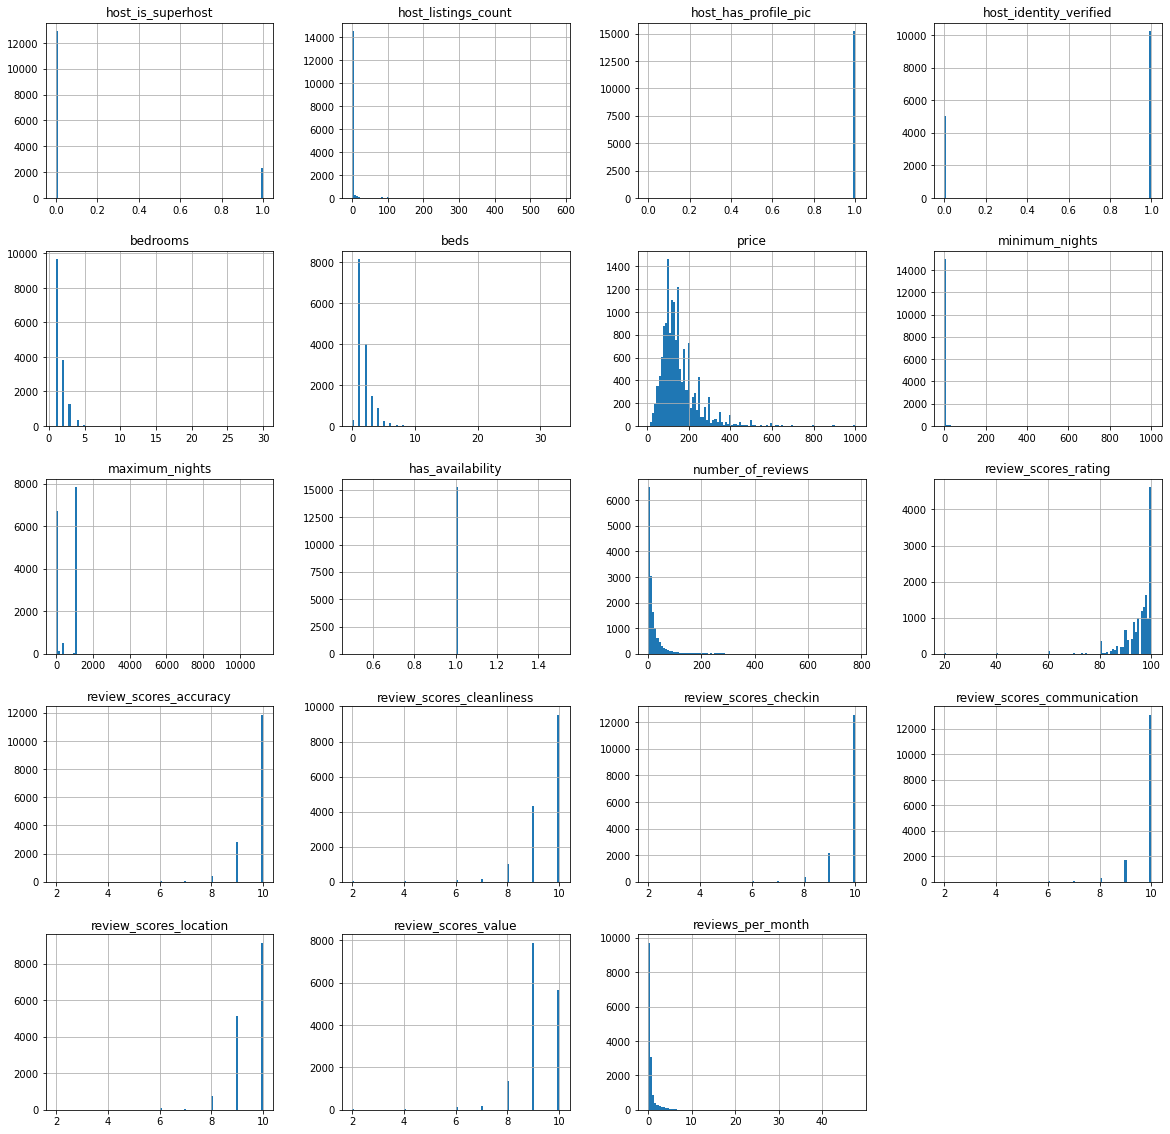

In [25]:
# Посмотрим на распределение цен на апартаменты:

import matplotlib.pyplot as plt

# for column in df.columns:
#     series = df[column]
#     print(column)
#     plt.hist(series,100)
#     plt.show()

#     plt.boxplot(series)
#     plt.show()

# names = list(data.keys())
# values = list(data.values())

# fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
# axs[0].bar(df['neighbourhood_cleansed'], df['neighbourhood_cleansed'])
# axs[1].bar(df['property_type'], values)
# axs[2].bar(names, values)

# display(df[['neighbourhood_cleansed', 'price']].groupby(['neighbourhood_cleansed']).mean().plot.bar())
# display(df[['neighbourhood_cleansed', 'price']].groupby(['neighbourhood_cleansed']).mean().sort_values(by='price', ascending=False))
# display(df[['neighbourhood_cleansed', 'price']].groupby(['neighbourhood_cleansed']).count().sort_values(by='price', ascending=False))
# display(df[['property_type', 'price']].groupby(['property_type']).mean().sort_values(by='price', ascending=False))
# display(df[['property_type', 'price']].groupby(['property_type']).count().sort_values(by='price', ascending=False))
# display(df[['room_type', 'price']].groupby(['room_type']).mean().sort_values(by='price', ascending=False))
# display(df[['room_type', 'price']].groupby(['room_type']).count().sort_values(by='price', ascending=False))

df.hist(figsize=(20,20), bins=100);

In [26]:
TARGET_COLUMN = 'price'
ALL_BUT_TARGET_COLUMN = df.columns[df.columns != TARGET_COLUMN]


In [27]:
# import matplotlib.pyplot as plt
# from sklearn import linear_model
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split

# TARGET_COLUMN = 'price'

# ALL_BUT_TARGET_COLUMN = df.columns[df.columns != TARGET_COLUMN]

# train, test = train_test_split(df, test_size=0.2)

# # Тренировочная выборка
# predictors = train[ALL_BUT_TARGET_COLUMN]
# target = train[[TARGET_COLUMN]]

# # Контрольная выборка
# test_predictors = test[ALL_BUT_TARGET_COLUMN]
# test_target = test[[TARGET_COLUMN]]

# regr = linear_model.LinearRegression()
# est = regr.fit(predictors, target)

# # Предсказываем на контрольной выборке
# prediction = regr.predict(test_predictors)


# mse = mean_squared_error(test_target, prediction)
# mse_root = math.sqrt(mean_squared_error(test_target, prediction))
# r2 = r2_score(test_target, prediction)

# print('MSE: %.2f' % mse)
# print('Mean Error: %.2f' % mse_root)
# print('R^2: %.2f' % r2)

# print('Коэфициенты: \n', pd.DataFrame(regr.coef_[0].round(3), index=ALL_BUT_TARGET_COLUMN))
# print(len(regr.coef_[0]))
# print(len(ALL_BUT_TARGET_COLUMN))

# Пробуем кросс-валидацию???

In [41]:
from patsy import dmatrices
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np

# Уравнение регрессии
equation = TARGET_COLUMN + ' ~ ' + (' + '.join(ALL_BUT_TARGET_COLUMN))

y, X = dmatrices(equation, data=df, return_type='dataframe')

renamer = lambda x: x.replace('[', '_').replace(']', '')

y = y.rename(columns = renamer)
X = X.rename(columns = renamer)

# Разбиваем выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 1000)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print('MSE: %.2f' % mse)
print('Mean Error: %.2f$' % rmse)
print('R^2: %.2f' % r2)

# print('Коэфициенты: \n', pd.DataFrame(xg_reg.coef_[0].round(3), index=ALL_BUT_TARGET_COLUMN))
# print(len(xg_reg.coef_))
# print(len(ALL_BUT_TARGET_COLUMN))



# Пробуем кросс-валидацию
# data_dmatrix = xgb.DMatrix(data=X,label=y)

# params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
#                 'max_depth': 5, 'alpha': 10}

# cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
#                     num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

# xgb.plot_tree(xg_reg,num_trees=0)
# plt.rcParams['figure.figsize'] = [50, 10]
# plt.show()

MSE: 4745.17
Mean Error: 68.89$
R^2: 0.48


In [29]:
# Пробуем использовать нормальную либу для регрессии
# import numpy as np
# import statsmodels.api as sm
# from patsy import dmatrices

# Попробуем сократить модель только до самых частых вариантов:
# Entire apartment 	9726
# Private room in apartment 	1836
# Entire house 	970
# Entire townhouse 	399
# Private room in house 	277

# part_df=df.where((df['property_type'] == 'Entire apartment') |
#             (df['property_type'] == 'Private room in apartment') |
#             (df['property_type'] == 'Entire house') |
#             (df['property_type'] == 'Entire townhouse') |
#             (df['property_type'] == 'Private room in house'))

# part_df=df.where((df['property_type'] == 'Entire apartment'))
# part_df=df.where((df['room_type'] == 'Private room'))
# part_df = df
# display(df.dtypes)

# target = df[TARGET_COLUMN].to_numpy(dtype='float')
# predictors = df[ALL_BUT_TARGET_COLUMN].to_numpy(dtype='float')

# equation = TARGET_COLUMN + ' ~ ' + (' + '.join(ALL_BUT_TARGET_COLUMN))
# y, X = dmatrices(equation, data=part_df, return_type='dataframe')

# model = sm.GLS(y, X)
# results = model.fit()
# display(results.summary())

In [30]:
# display(results.pvalues.round(3).sort_values(ascending=False))